<h2>PLOT COVERAGE OVER LENGTH FOR EACH ISOLATE</h2>
<p>This R script plots the coverage vs length for each assembly. Each circle represents a contig. If the circle is black, then that contig maps to Burkholderia. If the circle is red, then that contig maps to another genus.</p>
<p>Figures can be located at:
<ul>
<li>Summary of all assemblies can be found in <b>figures/AssemblyCoverageOverLength_all.dcn.pdf</b></li>
</ul>
</p>

In [1]:
library(tools)

In [4]:
# Set canvas to draw plot 
pdf("../figures/AssemblyCoverageOverLength_all.dcn.pdf", width=50, height=40)
par(mfrow=c(8,10))

# Loop through data from each isolate
con = file("../doc/IdList.txt", "r")
while ( TRUE ) {
    line = readLines(con, n = 1)
    if ( length(line) == 0 ) {
        break
    }
    # Name of the file
    file <- paste("../results/decontamination/ParsedAssemblyMetrics_",line,".csv",sep="")
    # Parse name for the title
    fileName <- file_path_sans_ext(file)
    fileName <- strsplit(fileName,'_')[[1]]
    # Get the data
    data <- as.data.frame(read.delim(file, sep=",", as.is=T, header=TRUE))
    # Draw plot
    plot(log10(data$ContigLength), log10(data$ContigCoverage), pch=21, cex=0.8, col=data$circle, bg=data$fill, xlab="Contig Length (log)", ylab="Contig Coverage (log)",las=1, main=fileName[[2]], ylim=c(min(0),max(4.5)))
}

close(con)

dev.off()

pdf 
  2

<h2>CLOSER LOOK TO SPECIFIC ISOLATES</h2>
<p>This part of the script is simply to take a closer look to the coverage over length plot for a specific isolate.</p>

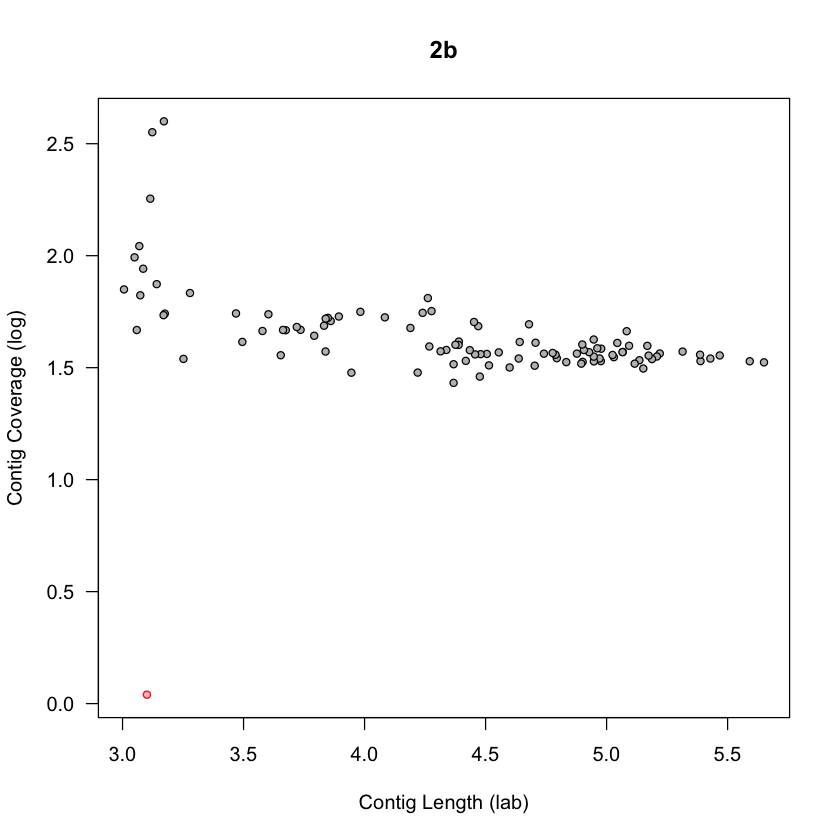

In [13]:
# This part of the code can be changed to the isolate to be inspected.
isolate <- "2b"
# Plotting the respective graph
fileName <- paste("../results/decontamination/ParsedAssemblyMetrics_",isolate,".csv",sep="")
data <- as.data.frame(read.delim(fileName, sep=",", as.is=T, header=TRUE))
plot(log10(data$ContigLength),log10(data$ContigCoverage),pch=21,cex=0.8,col=data$circle,bg=data$fill,xlab="Contig Length (lab)", ylab="Contig Coverage (log)", las=1, main=isolate)